<a href="https://colab.research.google.com/github/aislam388/Transfer_Learning/blob/main/Trnasfer_Learning_Resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import os
import string
from collections import Counter
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras import layers, models, optimizers
from keras import backend as K
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras import Model, layers
from keras.models import load_model, model_from_json

In [ ]:
input_path = "/content/drive/My Drive/LIDC-IDRI-0001/01-01-2000-30178/3000566-03192/"

In [ ]:
# Parameters for Image Generator
# params = {'rescale':1./255, 'rotation_range':40, 'zoom_range':0.15, 'width_shift_range':0.2, 'height_shift_range':0.2, 'shear_range':0.05, 'horizontal_flip':True, 'featurewise_std_normalization':True, 'featurewise_center':True, 'fill_mode':'nearest'}

# Image Data Generator configuration
# image_gen = ImageDataGenerator(**params)

train_datagen = ImageDataGenerator(
    shear_range=10,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=preprocess_input)

# Train Split
train_generator  = train_datagen.flow_from_directory(
    input_path + "Training",
    batch_size = 10,
    class_mode = 'categorical',
    target_size = (224,224))
# directory= '/content/drive/My Drive/LIDC-IDRI-0001/01-01-2000-30178/3000566-03192/Training/',

# batch_size=5,
# target_size=(224, 224),
# color_mode="rgb",
# class_mode="binary",
# shuffle=False,
# seed=42)
    
# Validation Split
validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)

validation_generator  = validation_datagen.flow_from_directory(
    input_path + 'Validation',
    shuffle=False,
    class_mode='categorical',
    target_size=(224,224))



# directory= '/content/drive/My Drive/LIDC-IDRI-0001/01-01-2000-30178/3000566-03192/Validation/',
# batch_size=5,
# target_size=(224, 224),
# color_mode="rgb",
# class_mode="binary",
# shuffle=False,
# seed=42)
    
# Test Split
# test_generator  = image_gen.flow_from_directory(
# directory= '/content/drive/My Drive/LIDC-IDRI-0001/01-01-2000-30178/3000566-03192/Testing/',
# batch_size=5,
# target_size=(224, 224),
# color_mode="rgb",
# class_mode="binary",
# shuffle=False,
# seed=42)

Found 140 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [ ]:
conv_base = ResNet50(
    include_top=False,
    weights='imagenet')

for layer in conv_base.layers:
    layer.trainable = False

94658560/94653016 [==============================] - 7s 0us/step


In [ ]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 
predictions = layers.Dense(2, activation='softmax')(x)
model = Model(conv_base.input, predictions)

In [ ]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
conv_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
___________________________________________________________________________________________

In [ ]:
# import os

# pre_trained_model = MobileNetV2(input_shape = (224, 224, 3), 
#                                 include_top = False, 
#                                 weights = None)

# pre_trained_model.load_weights(local_weights_file, by_name=True)

In [ ]:
# pre_trained_model.summary()

In [ ]:
# for layer in pre_trained_model.layers:
#     layer.trainable = False
    
# # pre_trained_model.summary()

# last_layer = pre_trained_model.get_layer('out_relu')
# print('last layer output shape: ', last_layer.output_shape)
# last_output = last_layer.output

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
# x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
# x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
# x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
# x = layers.Dense  (1, activation='sigmoid')(x)    

x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 
predictions = layers.Dense(2, activation='softmax')(x)
model = Model(conv_base.input, predictions)

# model = Model( conv_base.input, x) 

model.compile(optimizer = keras.optimizers.Adam(), 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
____________________________________________________________________________________________

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=100)

Epoch 1/100
14/14 [==============================] - 3s 226ms/step - loss: 0.1902 - acc: 0.9357 - val_loss: 0.5448 - val_acc: 0.7333
Epoch 2/100
14/14 [==============================] - 3s 198ms/step - loss: 0.2494 - acc: 0.9214 - val_loss: 0.8632 - val_acc: 0.6333
Epoch 3/100
14/14 [==============================] - 3s 199ms/step - loss: 0.2347 - acc: 0.9000 - val_loss: 0.7492 - val_acc: 0.6667
Epoch 4/100
14/14 [==============================] - 3s 202ms/step - loss: 0.1848 - acc: 0.9429 - val_loss: 0.6038 - val_acc: 0.6667
Epoch 5/100
14/14 [==============================] - 3s 198ms/step - loss: 0.2754 - acc: 0.8500 - val_loss: 0.4307 - val_acc: 0.8333
Epoch 6/100
14/14 [==============================] - 3s 200ms/step - loss: 0.2104 - acc: 0.9000 - val_loss: 0.6265 - val_acc: 0.7333
Epoch 7/100
14/14 [==============================] - 3s 200ms/step - loss: 0.2156 - acc: 0.9214 - val_loss: 0.3537 - val_acc: 0.9000
Epoch 8/100
14/14 [==============================] - 3s 200ms/step - 

Text(0.5, 1.0, 'Training and Validation loss')

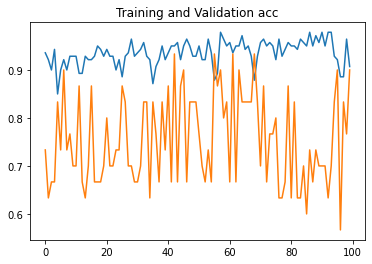

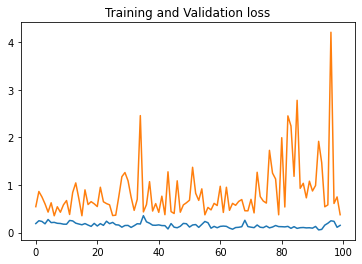

In [ ]:
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and Validation acc')
plt.figure()

plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and Validation loss')

In [ ]:
model.save(input_path+'models/keras.model.h5')

In [ ]:
model.save_weights(input_path+'models/keras/weights.h5')
with open(input_path+'models/keras/architecture.json', 'w') as f:
        f.write(model.to_json())

In [ ]:
with open(input_path+'models/keras/architecture.json') as f:
    model = model_from_json(f.read())
model.load_weights(input_path+'models/keras/weights.h5')